In [9]:
import pandas as pd
import sqlite3
from pathlib import Path
import matplotlib.pyplot as plt
from func_auxiliares.config import DB_PATH

conn=sqlite3.connect(str(DB_PATH))
df=pd.read_sql_query(
    "Select año, crecimiento from tasa_crecimiento_pib", conn
)
df

,año,crecimiento
0,1951,7.28
1,1952,3.81
2,1953,-9.89
3,1954,2.27
4,1955,4.54
...,...,...
69,2020,-8.74
70,2021,6.11
71,2022,3.74
72,2023,2.00


In [16]:
# Elige el tamaño de ventana (número de años)
window = 10  # por ejemplo, 5 años

# 1. Media móvil centrada
df['rolling_mean'] = df['crecimiento'] \
    .rolling(window=window, center=True) \
    .mean()

# 2. Desviación estándar móvil centrada
df['rolling_std'] = df['crecimiento'] \
    .rolling(window=window, center=True) \
    .std()
df.head()

,año,crecimiento,rolling_mean,rolling_std
0,1951,7.28,NaN,NaN
1,1952,3.81,NaN,NaN
2,1953,-9.89,NaN,NaN
3,1954,2.27,NaN,NaN
4,1955,4.54,NaN,NaN


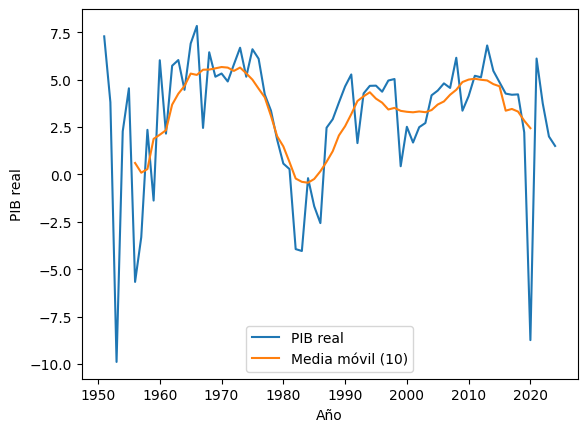

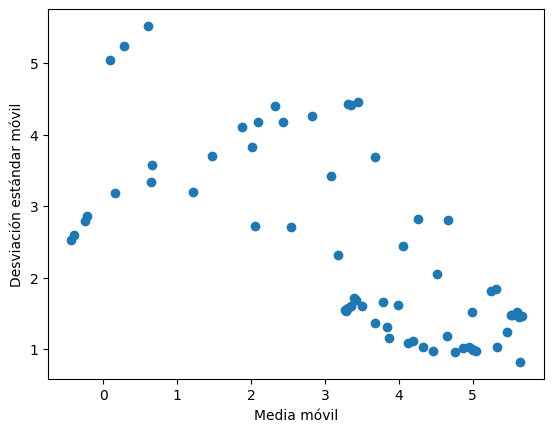

Correlación entre media y dispersión: -0.677


In [17]:
import matplotlib.pyplot as plt

# Serie original + media móvil
plt.figure()
plt.plot(df['año'], df['crecimiento'], label='PIB real')
plt.plot(df['año'], df['rolling_mean'],    label=f'Media móvil ({window})')
plt.xlabel('Año')
plt.ylabel('PIB real')
plt.legend()
plt.show()

# Dispersión: media vs std móvil
plt.figure()
plt.scatter(df['rolling_mean'], df['rolling_std'])
plt.xlabel('Media móvil')
plt.ylabel('Desviación estándar móvil')
plt.show()

# Opcional: cuantificar correlación
corr = df[['rolling_mean','rolling_std']].corr().iloc[0,1]
print(f"Correlación entre media y dispersión: {corr:.3f}")
